In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [4]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.9 MB/s eta 0:00:00


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [30]:
# load dataset from google drive

df= pd.read_excel('/content/drive/MyDrive/Mw work/customer_churn_large_dataset.xlsx')

In [8]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [9]:
df.shape

(100000, 9)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [11]:
df.columns.values


array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [12]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

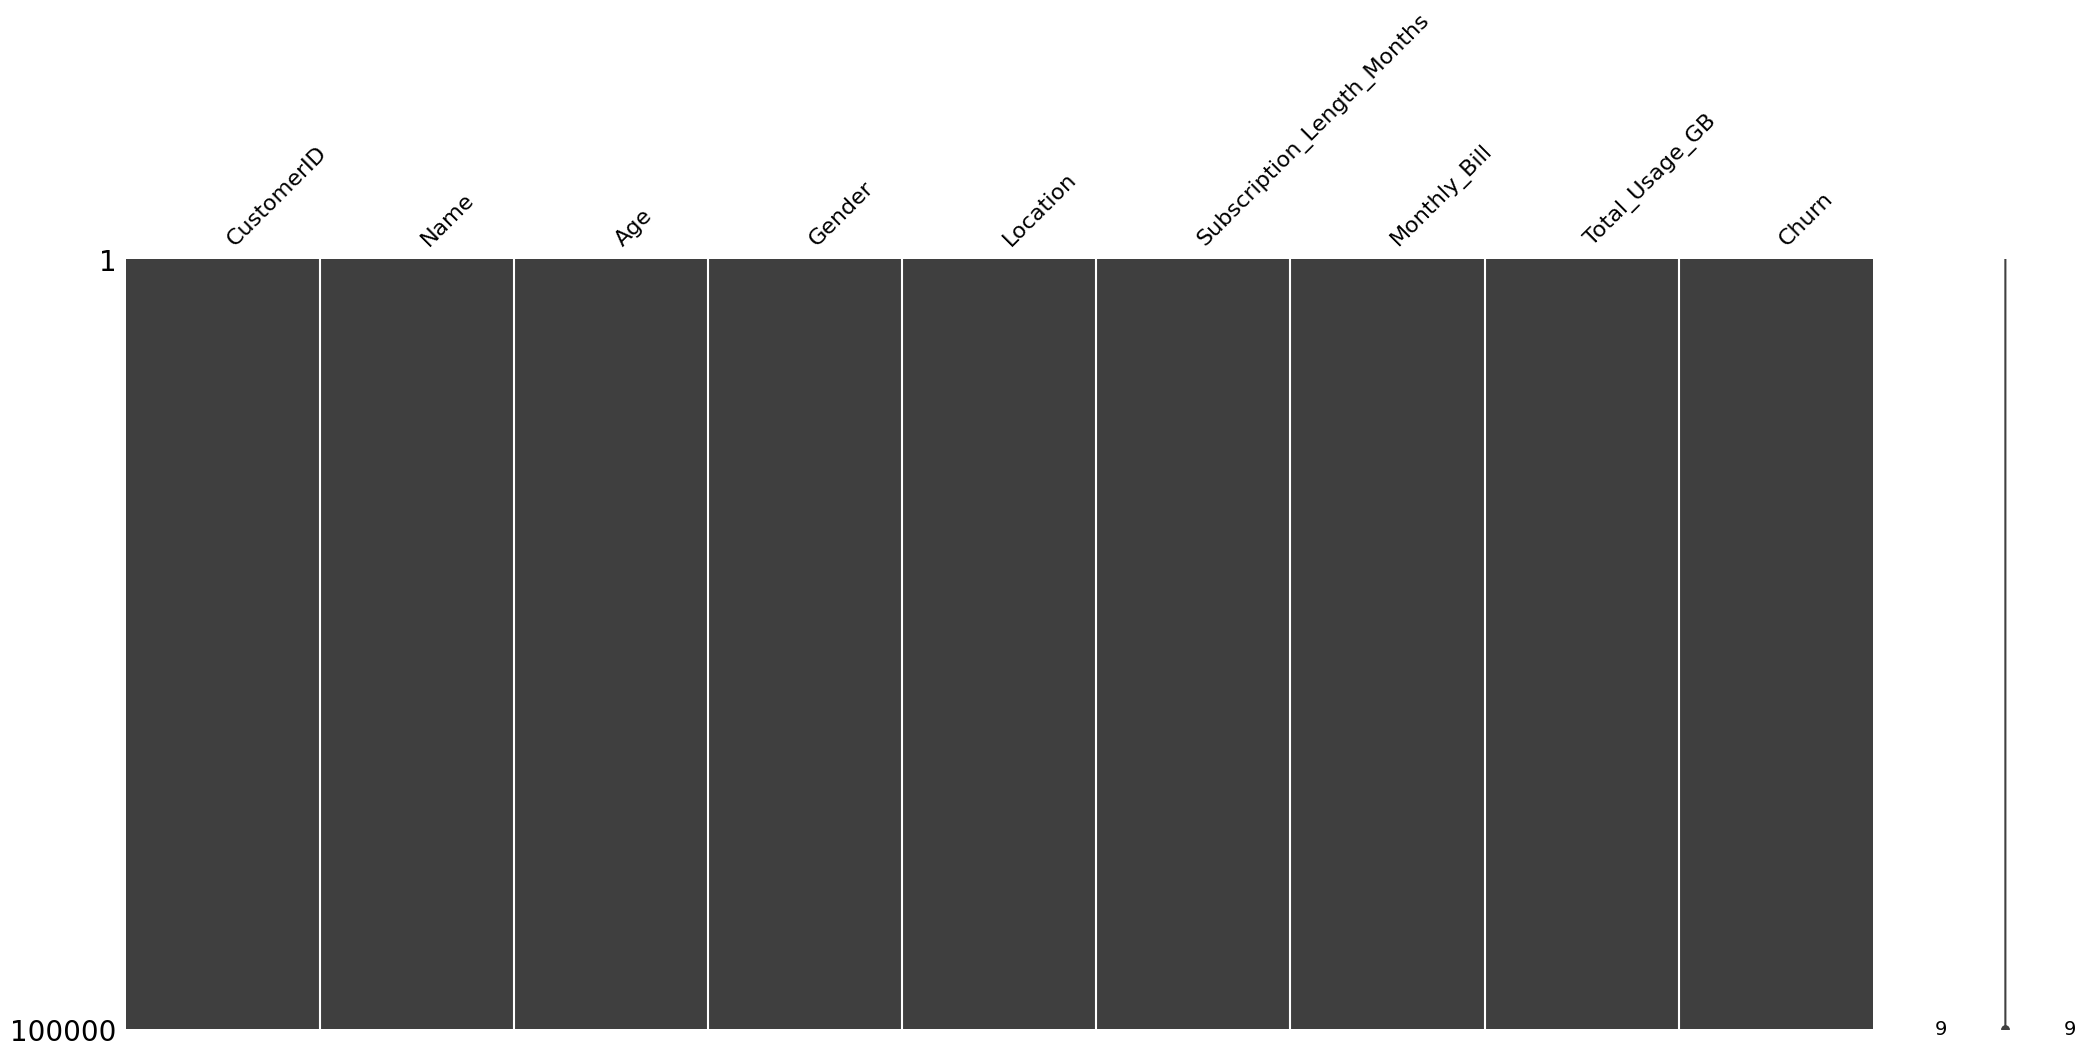

In [13]:
# Visualize missing values as a matrix
msno.matrix(df);

**Using this matrix we can very quickly find the pattern of missingness in the dataset.

From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.**

In [31]:
df = df.drop(['CustomerID','Name'], axis = 1)
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


**On* deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that!

In [21]:
# df['Monthly_Bill'] = pd.to_numeric(df.Monthly_Bill, errors='coerce')
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [22]:
df[np.isnan(df['Monthly_Bill'])]

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


In [23]:
df[np.isnan(df['Subscription_Length_Months'])]

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


In [24]:
df[np.isnan(df['Total_Usage_GB'])]

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


In [25]:
df[df['Subscription_Length_Months'] == 0].index

Int64Index([], dtype='int64')

In [26]:
df[df['Monthly_Bill'] == 0].index

Int64Index([], dtype='int64')

In [ ]:
#if nan or 0
#df.drop(labels=df[df['Monthly_Bill'] == 0].index, axis=0, inplace=True)
# df[df['Monthly_Bill'] == 0].index
#df.fillna(df["TotalCharges"].mean()) To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values.

In [27]:
df[df['Total_Usage_GB'] == 0].index

Int64Index([], dtype='int64')

No zero or NAN found


In [32]:
# df["Gender"]= df["Gender"].map({0: "Male", 1: "Female"})
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [34]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()



1.  49.8  % of customers switched to another firm.
2.   Customers are 49.8 % female and
    50.2 % male.



In [36]:
df["Churn"][df["Churn"]==0].groupby(by=df["Gender"]).count() #No

Gender
Female    25272
Male      24949
Name: Churn, dtype: int64

In [38]:
df["Churn"][df["Churn"]==1].groupby(by=df["Gender"]).count() #YES

Gender
Female    24944
Male      24835
Name: Churn, dtype: int64

There is negligible difference in customer percentage/ count who changed the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [42]:
fig = px.histogram(df, x="Churn", color="Location", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [43]:
fig = px.histogram(df, x="Churn", color="Gender", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [46]:
fig = px.histogram(df, x="Churn", color="Subscription_Length_Months", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

# Data Preprocessing

In [47]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [48]:
df = df.apply(lambda x: object_to_int(x))
df.head()


,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0


In [49]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn                         1.000000
Location                      0.006405
Subscription_Length_Months    0.002328
Gender                        0.002121
Age                           0.001559
Monthly_Bill                 -0.000211
Total_Usage_GB               -0.002842
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [50]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [52]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

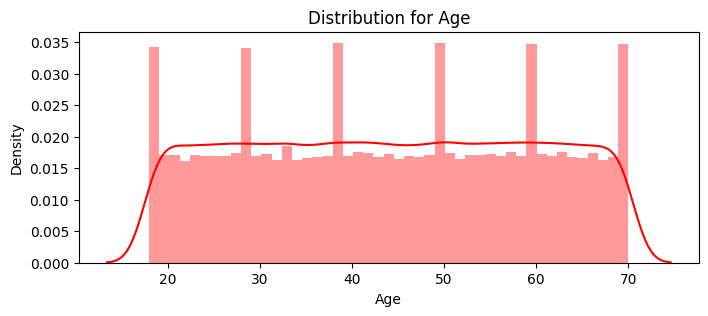

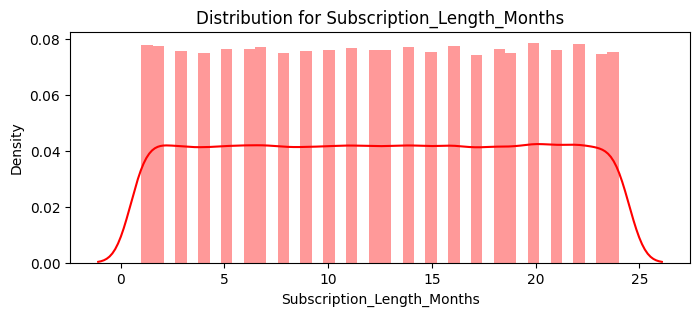

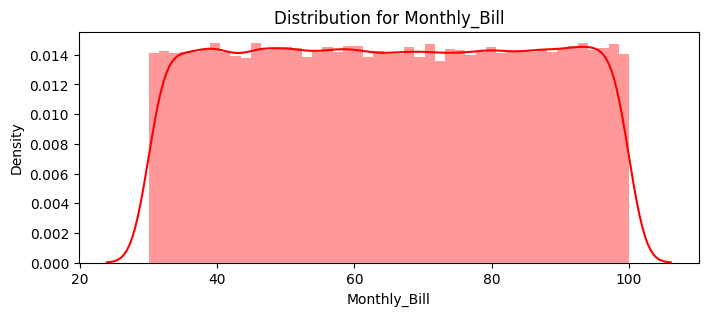

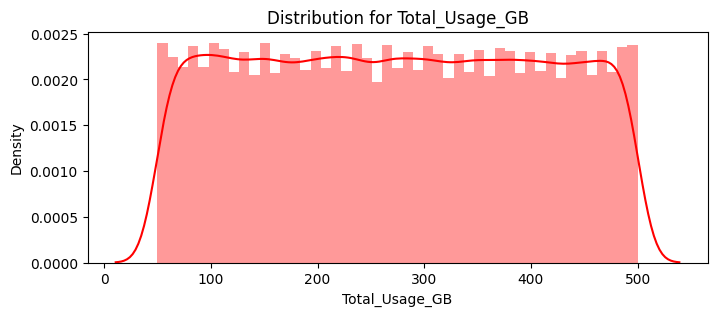

In [53]:
num_cols = ["Age", 'Subscription_Length_Months', 'Monthly_Bill','Total_Usage_GB']
for feat in num_cols: distplot(feat, df)

# Since the numerical features are distributed over **Different**value ranges, I will use standard scalar to scale them down to the same range.

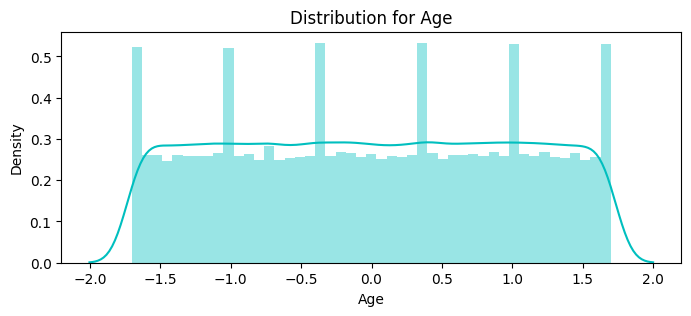

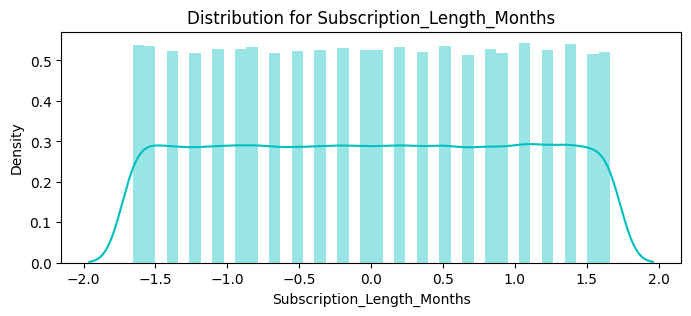

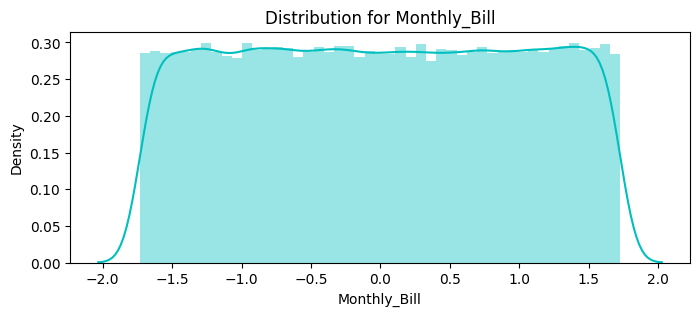

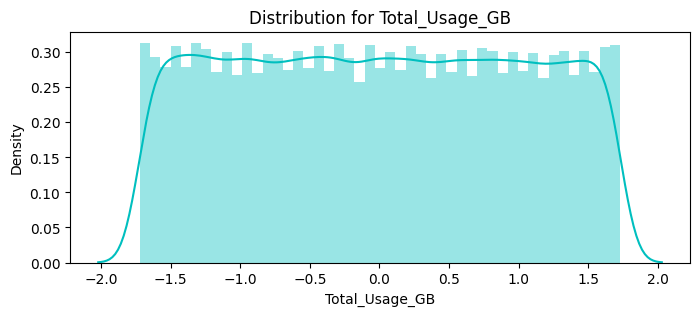

In [55]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, df_std, color='c')

In [56]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['Gender', 'Location'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [57]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Machine Learning Model Evaluations and Predictions

KNN

In [58]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.5004666666666666


In [59]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     15066
           1       0.50      0.50      0.50     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



SVC


In [60]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.5006


In [61]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55     15066
           1       0.50      0.40      0.44     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



Random Forest

In [62]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.49956666666666666


In [63]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.50      0.64      0.56     15066
           1       0.50      0.36      0.42     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



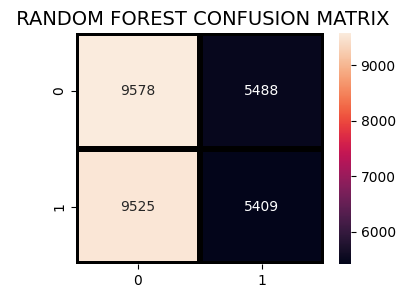

In [64]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

Logistic Regression

In [65]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.5022333333333333


In [66]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.70      0.59     15066
           1       0.50      0.30      0.37     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.48     30000
weighted avg       0.50      0.50      0.48     30000



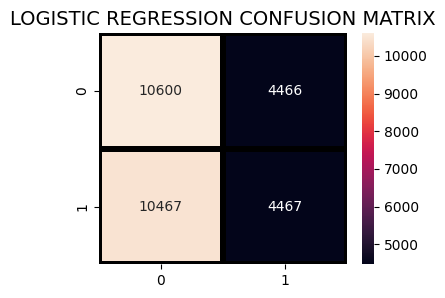

In [67]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

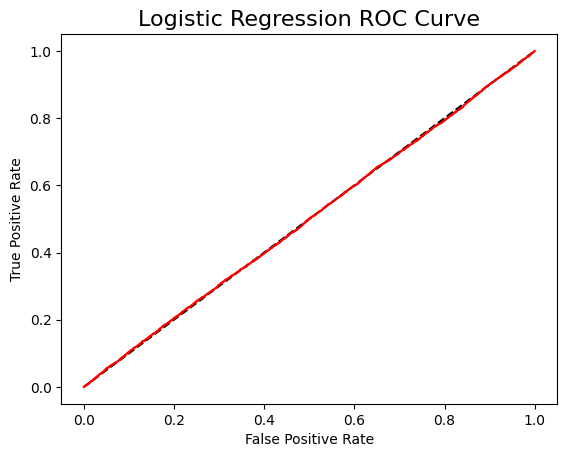

In [68]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

Decision Tree Classifier

In [69]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.504


In [70]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51     15066
           1       0.50      0.50      0.50     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



AdaBoost Classifier

In [71]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.49366666666666664

In [72]:
print(classification_report(y_test, a_preds))


              precision    recall  f1-score   support

           0       0.50      0.58      0.53     15066
           1       0.49      0.41      0.45     14934

    accuracy                           0.49     30000
   macro avg       0.49      0.49      0.49     30000
weighted avg       0.49      0.49      0.49     30000



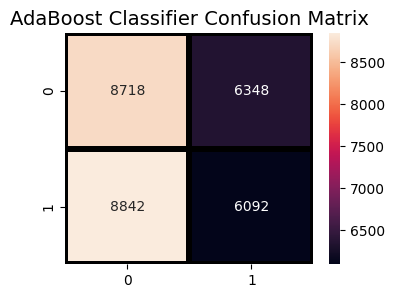

In [73]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

Gradient Boosting Classifier

In [74]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.49966666666666665


In [75]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.50      0.56      0.53     15066
           1       0.50      0.44      0.47     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



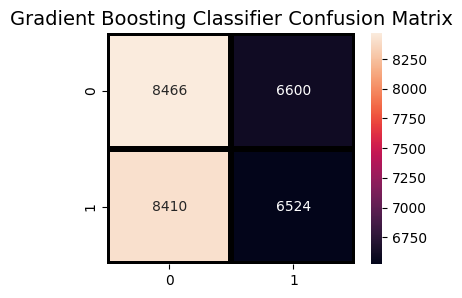

In [76]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

In [78]:
ts=[0.5,.4,.3,.2,.1]
acc=[]#one empty list for storing accuracy score
for i in ts:
    x_train1,x_test1, y_train1 , y_test1 = train_test_split(X,y,test_size= i, random_state = 20)
    model1=RandomForestClassifier()
    model1.fit(x_train1,y_train1)
    pred1=model1.predict(x_test1)
    acc.append(round(accuracy_score(y_test1,pred1)*100))
print(acc)

[50, 50, 50, 50, 50]
